In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


###### Import Packages

In [103]:
import keras
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

In [104]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(1000)

###### Dataset Creation

In [105]:
image_directory = 'images2/'
SIZE = 64
dataset = []
label = []

dyslexic_image = os.listdir(image_directory + 'dyslexic/')
for i, image_name in enumerate(dyslexic_image):
    if(image_name.split('.')[1] == 'jpg'):
        image=cv2.imread(image_directory + 'dyslexic/'+ image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        #print(image)
        dataset.append(np.array(image))
        label.append(0)
 

non_dyslexic_image = os.listdir(image_directory + 'non_dyslexic/')
for i, image_name in enumerate(non_dyslexic_image):
    if(image_name.split('.')[1] == 'jpg'):
        image=cv2.imread(image_directory + 'non_dyslexic/'+ image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
        label.append(1)

# print(dataset)

###### Model Development

In [106]:
INPUT_SHAPE = (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis=-1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)

conv2 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
norm2 = keras.layers.BatchNormalization(axis=-1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

conv3 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop2)
pool3 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv3)
norm3 = keras.layers.BatchNormalization(axis=-1)(pool3)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

flat = keras.layers.Flatten()(drop2)

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis=-1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)

model= keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())



Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,340,130 (16.56 MB)

 Trainable params: 4,338,466 (16.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

None


###### Split Dataset into Trainign and Testing

In [124]:
from keras.utils import normalize
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state=0)

# # to normalize the valuse
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

X_train0, X_test0, y_train0, y_test0 = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

###### Model fit

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 810ms/step - accuracy: 0.5573 - loss: 0.9848 - val_accuracy: 0.5625 - val_loss: 11.9799
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - accuracy: 0.8490 - loss: 0.4677 - val_accuracy: 0.5625 - val_loss: 16.7855
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9427 - loss: 0.1480 - val_accuracy: 0.5625 - val_loss: 31.1872
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9688 - loss: 0.0884 - val_accuracy: 0.5625 - val_loss: 35.1814
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.9896 - loss: 0.0425 - val_accuracy: 0.5625 - val_loss: 37.6605
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 1.0000 - loss: 0.0215 - val_accuracy: 0.5625 - val_loss: 36.8137
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.5625 - val_loss: 36.0781
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.5625 - va

Test_Accuracy: 45.00%


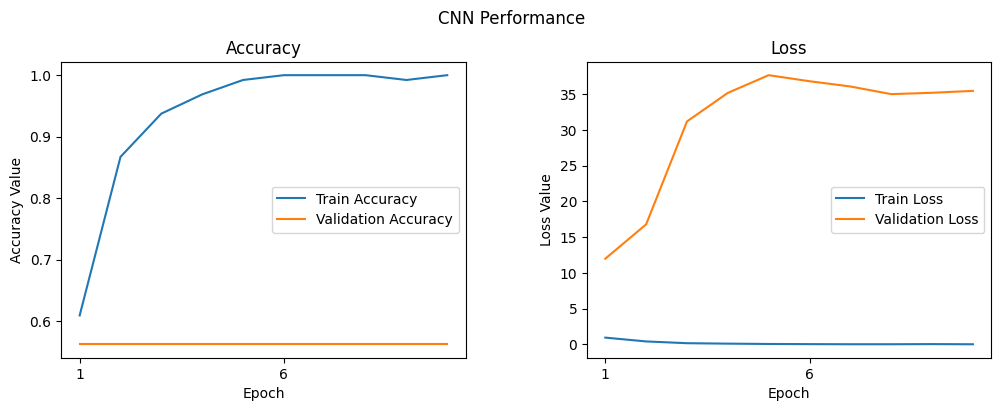

In [110]:
history = model.fit(np.array(X_train), y_train, batch_size = 64, verbose=1, epochs = 10, validation_split=0.20, shuffle=True)

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))


#Graphs plot 
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy']) +1
epoch_list = list(range(1, max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1,max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1,max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


#save model
model.save('dysdyslexic_cnn4.h5')




###### Model testing

In [121]:
from keras.models import load_model
model = load_model('dysdyslexic_cnn2.h5')
_, acc = model.evaluate(np.array(X_test), np.array(y_test))
print("Accuracy = ", (acc * 100.0), "%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9292 - loss: 0.6344 
Accuracy =  92.5000011920929 %


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[15  3]
 [ 0 22]]


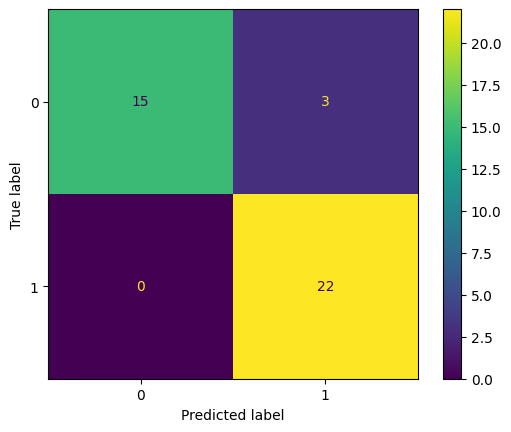

In [141]:
mythreshold=0.908
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred = (model.predict(np.array(X_test))>= mythreshold).astype(int)
#print(y_test)
y_test = y_test.astype(int)
#print(y_test)

cm=confusion_matrix(np.array(y_test.argmax(axis=1)), np.array(y_pred.argmax(axis=1)))
#confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [148]:
#Select the index of image to be loaded for testing
n=24
img = X_test[n]
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
The prediction for this image is:  [[0.98350143 0.00274353]]
The actual label for this image is:  [1 0]
